# General approach to logistic regression

1. Collect: Any method.

2. Prepare: Numeric values are needed for a distance calculation. A structured data
format is best.

3. Analyze: Any method.

4. Train: We’ll spend most of the time training, where we try to find optimal coefficients
to classify our data.

5. Test: Classification is quick and easy once the training step is done.

6. Use: This application needs to get some input data and output structured numeric
values. Next, the application applies the simple regression calculation on
this input data and determines which class the input data should belong to.
The application then takes some action on the calculated class.

Pros: Computationally inexpensive, easy to implement, knowledge representation
easy to interpret

Cons: Prone to underfitting, may have low accuracy

Works with: Numeric values, nominal values

We’d like to have an equation we can give all of our features and it will predict the
class. In the two-class case, the function will spit out a 0 or a 1. Perhaps you’ve seen this before; it’s called the Heaviside step function, or sometimes just the step function.
The problem with the Heaviside step function is that at the point where it steps from 0
to 1, it does so instantly. This instantaneous step is sometimes difficult to deal with.
There’s another function that behaves in a similar fashion, but it’s much easier to deal
with mathematically. This function is called the sigmoid.
https://en.wikipedia.org/wiki/Sigmoid_function

For the logistic regression classifier we’ll take our features and multiply each one
by a weight and then add them up. This result will be put into the sigmoid, and we’ll
get a number between 0 and 1. Anything above 0.5 we’ll classify as a 1, and anything
below 0.5 we’ll classify as a 0. You can also think of logistic regression as a probability
estimate.

The question now becomes, what are the best weights, or regression coefficients to
use, and how do we find them?

### Pseudocode for the gradient ascent would look like this:

Start with the weights all set to 1

Repeat R number of times:

    Calculate the gradient of the entire dataset

    Update the weights vector by alpha*gradient

    Return the weights vector

## Logistic regression gradient ascent optimization functions

In [8]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #convert to NumPy matrix
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights


The input classLabels is a 1x100
row vector, and for the matrix math to work, you need it to be a column vector, so you
take the transpose of it and assign that to the variable labelMat.

The variable alpha is the step size you’ll take toward the target, and maxCycles is
the number of times you’re going to repeat the calculation before stopping. The for
loop iterates over the dataset, and finally you return the weights.

The variable h is not one
number but a column vector with as many elements as you have data points, 100 in
this example. The multiplication dataMatrix * weights is not one multiplication but
actually 300.

In [9]:
dataArr,labelMat = loadDataSet()


In [10]:
gradAscent(dataArr,labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

# Analyze: plotting the decision boundary

We’re solving for a set of weights used to make a line that separates the different classes
of data.

In [28]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    %matplotlib inline
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    #Best-fit line
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

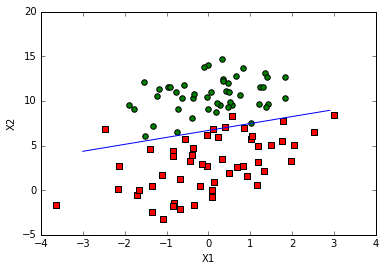

In [29]:
plotBestFit(gradAscent(dataArr,labelMat).getA())

# Train: stochastic gradient ascent

Pseudo-code

Start with the weights all set to 1

For each piece of data in the dataset:

    Calculate the gradient of one piece of data

    Update the weights vector by alpha*gradient

    Return the weights vector

In [49]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights


In [50]:
weights=stocGradAscent1(array(dataArr),labelMat)

You can see that stochastic gradient ascent is similar to gradient ascent except that the
variables h and error are now single values rather than vectors. There also is no
matrix conversion, so all of the variables are NumPy arrays.

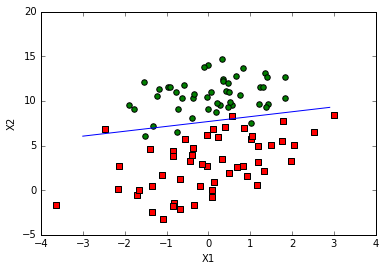

In [51]:
plotBestFit(weights)

In [53]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate


In [54]:
def multiTest():
    numTests = 10 ; errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations the average error rate is : %f" % (numTests,errorSum/float(numTests)))

In [55]:
multiTest()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in exp


the error rate of this test is: 0.358209
the error rate of this test is: 0.388060
the error rate of this test is: 0.358209
the error rate of this test is: 0.313433
the error rate of this test is: 0.298507
the error rate of this test is: 0.388060
the error rate of this test is: 0.388060
the error rate of this test is: 0.343284
the error rate of this test is: 0.283582
the error rate of this test is: 0.343284
after 10 iterations the average error rate is : 0.346269
